This notebook implements a Classifier Tree algorithm for the Digit Recognizer Kaggle competition found here: https://www.kaggle.com/c/digit-recognizer

Notebook by Jonathan Gomez Martinez

Here we import the libraries neccessary for our project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, matplotlib.image as mpimg
#from sklearn import svm
from sklearn import tree
from sklearn.metrics import confusion_matrix
%matplotlib inline

First step in training is to get the data ready. We import the data, provided as a csv on Kaggle.

In [2]:
raw = pd.read_csv("train.csv")
raw.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For testing purposes, we need to seperate the data set into training and testing sets.

In [3]:
test=raw.sample(frac=0.2,random_state=1251)  #We are creating an 80/20 split, the proportion can be changed by changing the number after  'frac='
train=raw.drop(test.index)
l1 = len(train)
l2 = len(test)
print("Now we have", l1, "training digits and", l2, "testing digits")

Now we have 33600 training digits and 8400 testing digits


Next, we need to seperate the labels from the drawn digits so the algorithm will not "know the answer" without computing it

In [4]:
train_x = train.iloc[0:,1:]
train_y = train.iloc[0:,:1]
#len(train_x)
#train_x.head()
#train_y.head()
test_x = test.iloc[0:,1:]
test_y = test.iloc[0:,:1]

For convenience and to get a better understanding, the below code shows what the digits look like when restored from their flattened state.

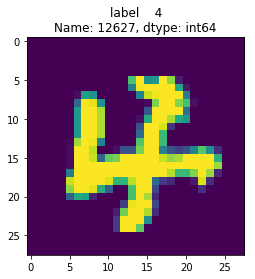

In [5]:
#The code below allows us to view the image and associated label for each digit
def showNum(row, x, y):
    i=row
    draw = x.iloc[i].as_matrix()
    a = draw.reshape((28,28))
    imgplot = plt.imshow(a)
    plt.title(y.iloc[i])
    
showNum(27, test_x, test_y)

Now we can train our classifier tree on the data

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)
clf.score(test_x, test_y)

0.85428571428571431

Since the data is still relatively "noisy" and a number can be determined regardless of color intensity, setting all colored cells to 1 and leaving all the others as 0 should lead to cleaner results

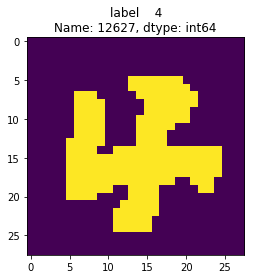

In [7]:
train_x[train_x>0]=1
test_x[test_x>0]=1
showNum(27, test_x, test_y)

Now we can retrain with the simplified images

In [8]:
#Retrain Model...
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)
clf.score(test_x, test_y)

0.87035714285714283

Here we'll use the predictions to create a confusion matrix, telling us the predictions compared to the real labels on a heat map.

array([[761,   1,  16,   3,   3,   9,  13,   5,   5,   2],
       [  0, 885,   6,   7,   5,   3,   2,   1,  13,   0],
       [  9,   9, 743,  33,   9,  11,  11,  13,  17,  12],
       [ 12,   9,  28, 704,   7,  40,  12,  15,  24,  20],
       [  6,   8,   9,   0, 709,   7,  10,   7,  21,  35],
       [  8,   9,   8,  46,   7, 607,  24,  11,  18,  20],
       [ 10,   4,  10,   4,  13,  18, 761,   2,  10,   5],
       [  1,   5,  16,  16,  12,   7,   1, 783,   6,  23],
       [ 11,  20,  26,  31,  20,  24,  15,  11, 652,  20],
       [ 11,   1,   3,  13,  38,  15,   1,  14,  13, 706]])

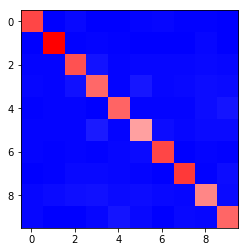

In [9]:
pred_y = clf.predict(test_x)
matrix = confusion_matrix(test_y, pred_y)
plt.imshow(matrix, interpolation='none', cmap = 'bwr')
matrix

In the confusion matrix above, the diagonal was too accurate and did not allow us to make much use of the rest of the graph. We will set the diagonal to zeros so we can better see the innaccurate results

array([[ 0,  1, 16,  3,  3,  9, 13,  5,  5,  2],
       [ 0,  0,  6,  7,  5,  3,  2,  1, 13,  0],
       [ 9,  9,  0, 33,  9, 11, 11, 13, 17, 12],
       [12,  9, 28,  0,  7, 40, 12, 15, 24, 20],
       [ 6,  8,  9,  0,  0,  7, 10,  7, 21, 35],
       [ 8,  9,  8, 46,  7,  0, 24, 11, 18, 20],
       [10,  4, 10,  4, 13, 18,  0,  2, 10,  5],
       [ 1,  5, 16, 16, 12,  7,  1,  0,  6, 23],
       [11, 20, 26, 31, 20, 24, 15, 11,  0, 20],
       [11,  1,  3, 13, 38, 15,  1, 14, 13,  0]])

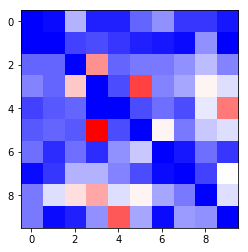

In [10]:
for i in range(10):
    matrix[i][i] = 0
plt.imshow(matrix, interpolation='none', cmap = 'bwr')
matrix